In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit import *
from qiskit import execute
#from qiskit.providers.ibmq import least_busy
import numpy as np
from numpy.random import randint
from qiskit.tools.visualization import circuit_drawer
import matplotlib.pyplot as plt
import math
from qiskit.circuit.library import RXGate,HGate
from qiskit.circuit.library.generalized_gates.mcmt import MCMTVChain,MCMT

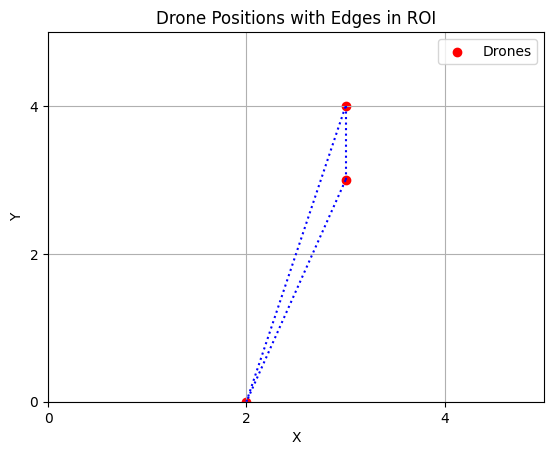

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Define the region of interest (ROI) boundaries
roi_x_min, roi_x_max = 0, 5
roi_y_min, roi_y_max = 0, 5

# Generate random drone positions within the ROI
num_drones = 3
drone_positions = np.random.randint(roi_x_min, roi_x_max, size=(num_drones, 2))

# Define connections between drones (edges)
connections = [(0, 1), (1, 2), (2, 0)]  # Modify this based on your requirements

# Create a grid overlay
grid_spacing = 2
grid_x = np.arange(roi_x_min, roi_x_max + grid_spacing, grid_spacing)
grid_y = np.arange(roi_y_min, roi_y_max + grid_spacing, grid_spacing)

# Create a figure and axis for plotting
fig, ax = plt.subplots()

# Plot the grid
ax.set_xticks(grid_x)
ax.set_yticks(grid_y)
ax.grid()

# Plot the drone positions
ax.scatter(drone_positions[:, 0], drone_positions[:, 1], c='red', label='Drones')

# Plot edges between drones
for connection in connections:
    start_pos = drone_positions[connection[0]]
    end_pos = drone_positions[connection[1]]
    ax.plot([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], c='blue', linestyle='dotted')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Drone Positions with Edges in ROI')

# Set the ROI boundaries
ax.set_xlim(roi_x_min, roi_x_max)
ax.set_ylim(roi_y_min, roi_y_max)

# Add a legend
ax.legend()

# Display the plot
plt.show()

# 5G Network Coverage MAP - Bad

# Quantum Walk Start

In [2]:
#Grover gate
grover2 = QuantumCircuit(2)
grover2.h([0,1])
grover2.z([0,1])
grover2.cz(0,1)
grover2.h([0,1])

Grover2 = grover2.to_gate(label = 'Grover')

In [3]:
#ccz
cir = QuantumCircuit(4)
cir = MCMT('cz',2,1)

ccz = cir.to_gate(label = 'ccz')

In [4]:
#cGrover gate
cgrover2 = QuantumCircuit(3)
cgrover2.ch(2,[0,1])
cgrover2.cz(2,[0,1])
cgrover2.append(ccz,[2,0,1])
cgrover2.ch(2,[0,1])

cGrover2 = cgrover2.to_gate(label = 'Controlled Grover')

# Define Oracle for Drone Task 1
# ex: Two drones in same area

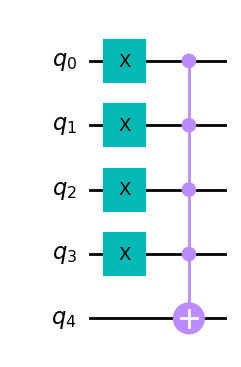

In [5]:
#Oracle
oracle = QuantumCircuit(5)
oracle.x([0,1,2,3])
oracle.mcx([0,1,2,3],4)
oracle.draw()

Oracle = oracle.to_gate(label = 'Oracle')
oracle.draw(output="mpl")

# Define Oracle for Drone Task 2
# ex: Check network in triangle connection

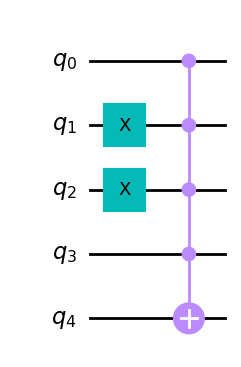

In [5]:
#Oracle Drone Number 2
#{ABCD}
elements = [1,2,2,3];
oracle = QuantumCircuit(5)
for i in range(len(elements)):
  # print(i)
  for j in range(i+1, len(elements)):
    # print(i,j)
    if elements[i] == elements[j]:
      oracle.x(i)
      oracle.x(j)
oracle.mcx([0,1,2,3],4)
oracle.draw()

Oracle = oracle.to_gate(label = 'Oracle')
oracle.draw(output="mpl")

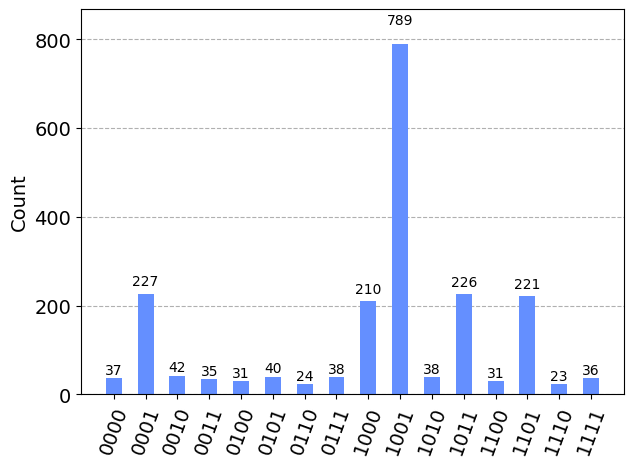

In [6]:
#Step 1 skw circuit
import math
n=4
nodeq = QuantumRegister(4, 'node')
coinq = QuantumRegister(2, 'coin')
redundantq = QuantumRegister(1, 'ancilla')
mclass = ClassicalRegister(4, 'c')
skw_circuit=QuantumCircuit(nodeq,coinq,redundantq,mclass)
skw_circuit.h(range(n+2))
skw_circuit.barrier()

#Shift
def shift_operator(circuit):
    for i in range(0,4):
        circuit.x(4)
        if i%2==0:
            circuit.x(5)
        circuit.ccx(4,5,i)

for iteration in range(5): 
    #O
    skw_circuit.append(Oracle,[0,1,2,3,6])
    skw_circuit.barrier()
    #G
    skw_circuit.x(6)
    skw_circuit.append(cGrover2,[4,5,6])
    skw_circuit.x(6)
    skw_circuit.barrier()
    #C1
    skw_circuit.crx(2*np.pi,6,4)
    skw_circuit.barrier()
    #O.inverse
    skw_circuit.append(Oracle.inverse(),[0,1,2,3,6])
    skw_circuit.barrier()
    
    #Shift
    shift_operator(skw_circuit)
    skw_circuit.barrier()
skw_circuit.measure(nodeq[0],mclass[0])
skw_circuit.measure(nodeq[1],mclass[1])
skw_circuit.measure(nodeq[2],mclass[2])
skw_circuit.measure(nodeq[3],mclass[3])
skw_circuit.draw(output="mpl")

simulator = Aer.get_backend('qasm_simulator')
job = execute(skw_circuit, simulator, shots = 2048)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

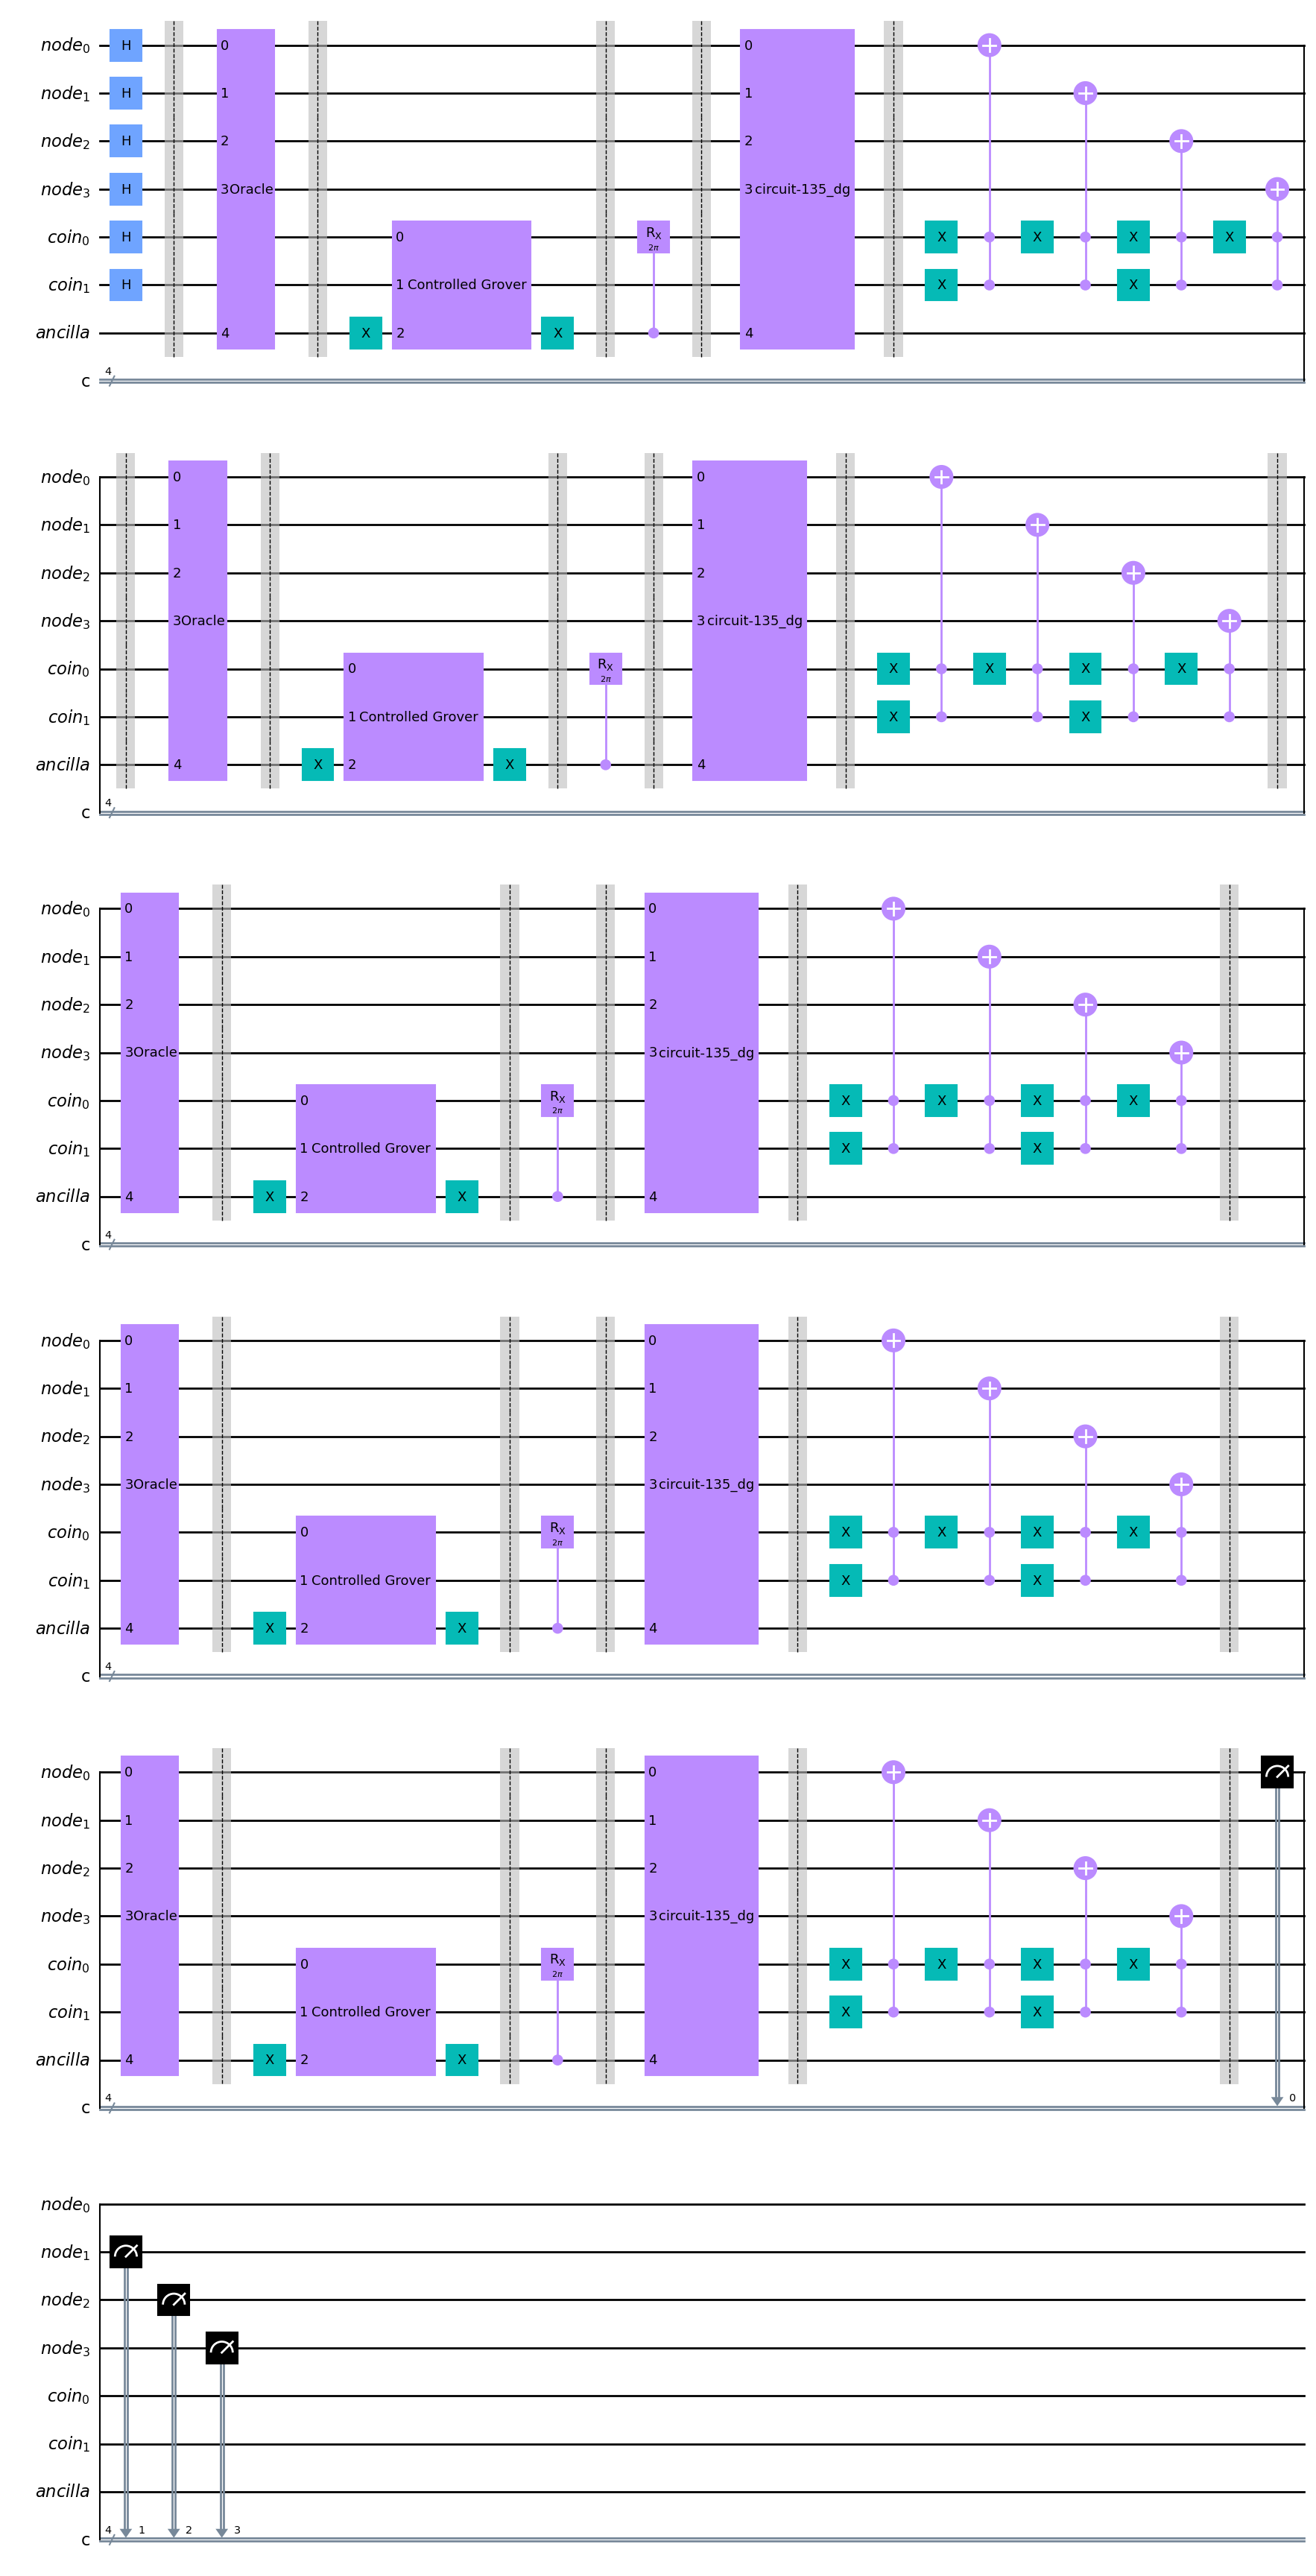

In [7]:
skw_circuit.draw(output="mpl")

In [9]:
!sh ~/projects/quantum_walk/run_on.sh 


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.




In [10]:
!sh ~/projects/quantum_walk/run_on.sh 


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.




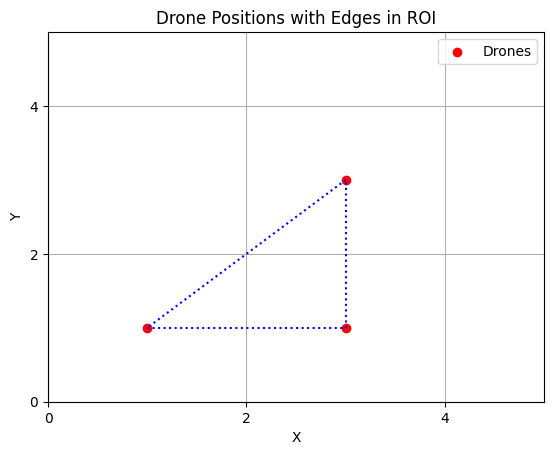

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Define the region of interest (ROI) boundaries
roi_x_min, roi_x_max = 0, 5
roi_y_min, roi_y_max = 0, 5

# Generate random drone positions within the ROI
num_drones = 3
drone_positions = np.random.randint(roi_x_min, roi_x_max, size=(num_drones, 2))

# Define connections between drones (edges)
connections = [(0, 1), (1, 2), (2, 0)]  # Modify this based on your requirements

# Create a grid overlay
grid_spacing = 2
grid_x = np.arange(roi_x_min, roi_x_max + grid_spacing, grid_spacing)
grid_y = np.arange(roi_y_min, roi_y_max + grid_spacing, grid_spacing)

# Create a figure and axis for plotting
fig, ax = plt.subplots()

# Plot the grid
ax.set_xticks(grid_x)
ax.set_yticks(grid_y)
ax.grid()

# Plot the drone positions
ax.scatter(drone_positions[:, 0], drone_positions[:, 1], c='red', label='Drones')

# Plot edges between drones
for connection in connections:
    start_pos = drone_positions[connection[0]]
    end_pos = drone_positions[connection[1]]
    ax.plot([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], c='blue', linestyle='dotted')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Drone Positions with Edges in ROI')

# Set the ROI boundaries
ax.set_xlim(roi_x_min, roi_x_max)
ax.set_ylim(roi_y_min, roi_y_max)

# Add a legend
ax.legend()

# Display the plot
plt.show()


# 5G Network Coverage MAP - Good

/tmp/ipykernel_6097/1595826938.py:56: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(job).result()


{'100': 115, '001': 122, '110': 133, '111': 126, '011': 124, '010': 143, '000': 121, '101': 116}


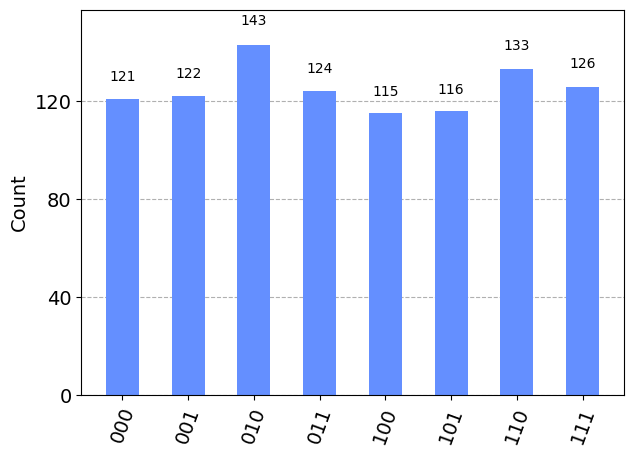

In [26]:
###Element Distinctness
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile, assemble, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram

# Function to create the quantum walk circuit
def quantum_walk_element_distinctness(elements):
    num_elements = len(elements)
    num_qubits = int(np.ceil(np.log2(num_elements)))

    # Initialize quantum and classical registers
    qr = QuantumRegister(num_qubits, 'q')
    cr = ClassicalRegister(num_qubits, 'c')
    qc = QuantumCircuit(qr, cr)

    # Quantum state preparation
    qc.h(qr)  # Apply Hadamard gates to create a superposition

    # Define the oracle
    for i in range(num_elements):
        for j in range(i + 1, num_elements):
            if elements[i] == elements[j]:
                # Apply the oracle conditionally
                qc.x(qr[i])  # Flip the qubit corresponding to the repeated element

    # Quantum walk steps
    for i in range(num_qubits):
        for j in range(i+1, num_qubits):
            # Apply controlled-X gates to create entanglement
            qc.cx(qr[i], qr[j])

            # Apply controlled-U1 gates for quantum walk step
            angle = np.pi / (2 ** (j - i))
            qc.cp(angle, qr[j], qr[i])

            # Reverse the controlled-X operation
            qc.cx(qr[i], qr[j])

    # Measure the quantum state
    qc.measure(qr, cr)

    return qc

# List of elements (modify as needed)
elements = [0, 1, 2, 3, 0]  # Example input with a repeated element

# Create the quantum circuit
qc = quantum_walk_element_distinctness(elements)



# Transpile and simulate the quantum circuit
simulator = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(qc, simulator)
job = assemble(transpiled_qc, shots=1000)
result = simulator.run(job).result()

# Get the measurement counts
counts = result.get_counts(qc)
print(counts)

plot_histogram(counts)

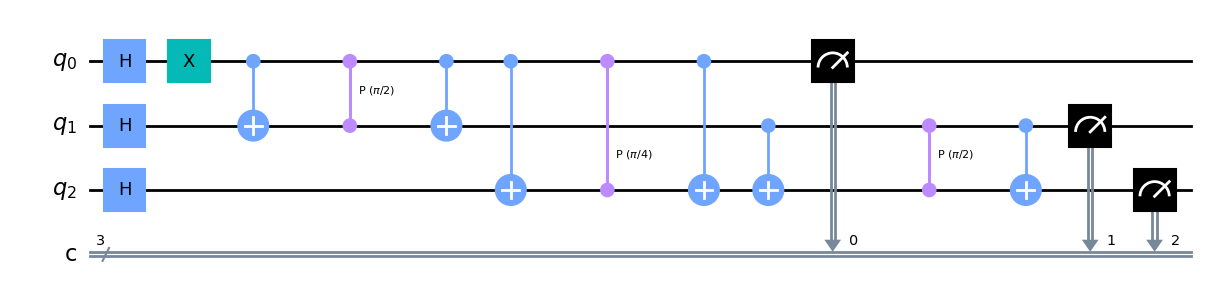

In [27]:
qc.draw(output="mpl")

/tmp/ipykernel_6097/971322056.py:44: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(job).result()


Measurement outcomes: {'101': 36, '010': 62, '000': 28, '100': 67, '110': 35, '001': 47, '011': 40, '111': 685}


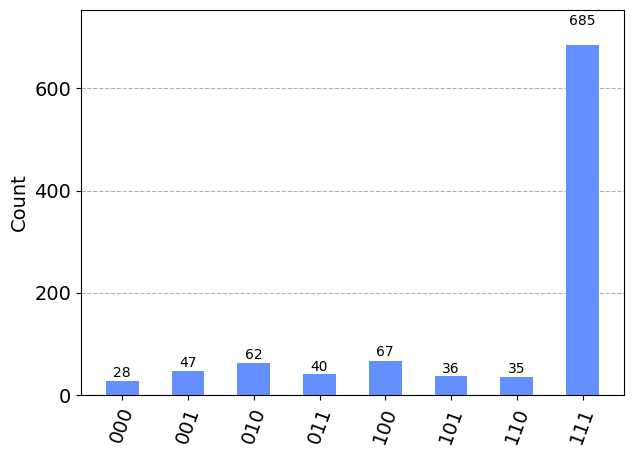

In [29]:
###Triangle Finding

import numpy as np
from qiskit import QuantumCircuit, transpile, assemble, Aer
from qiskit.visualization import plot_histogram

# Define the parameters
num_qubits = 3  # Number of qubits (representing graph nodes)
num_steps = 4   # Number of steps in the random walk

# Create the Quantum Circuit
qc = QuantumCircuit(num_qubits)

# Initialize the quantum state
initial_state = np.zeros(2**num_qubits)
initial_state[0] = 1.0  # Start from the first node
qc.initialize(initial_state, range(num_qubits))

# Perform the quantum random walk
for step in range(num_steps):
    # Apply a Hadamard gate to all qubits
    qc.h(range(num_qubits))

    # Perform conditional phase shifts for each edge
    for i in range(num_qubits):
        for j in range(i + 1, num_qubits):
            qc.cp(np.pi/4, i, j)  # Apply a controlled-phase gate

    # Apply Grover diffusion operator
    qc.h(range(num_qubits))
    qc.x(range(num_qubits))
    qc.h(num_qubits - 1)
    qc.mct(list(range(num_qubits - 1)), num_qubits - 1)  # Multi-controlled Toffoli
    qc.h(num_qubits - 1)
    qc.x(range(num_qubits))
    qc.h(range(num_qubits))

# Measure the final state
qc.measure_all()

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
job = assemble(transpile(qc, simulator), shots=1000)
result = simulator.run(job).result()
counts = result.get_counts()

# Display the measurement outcomes
print("Measurement outcomes:", counts)
plot_histogram(counts)

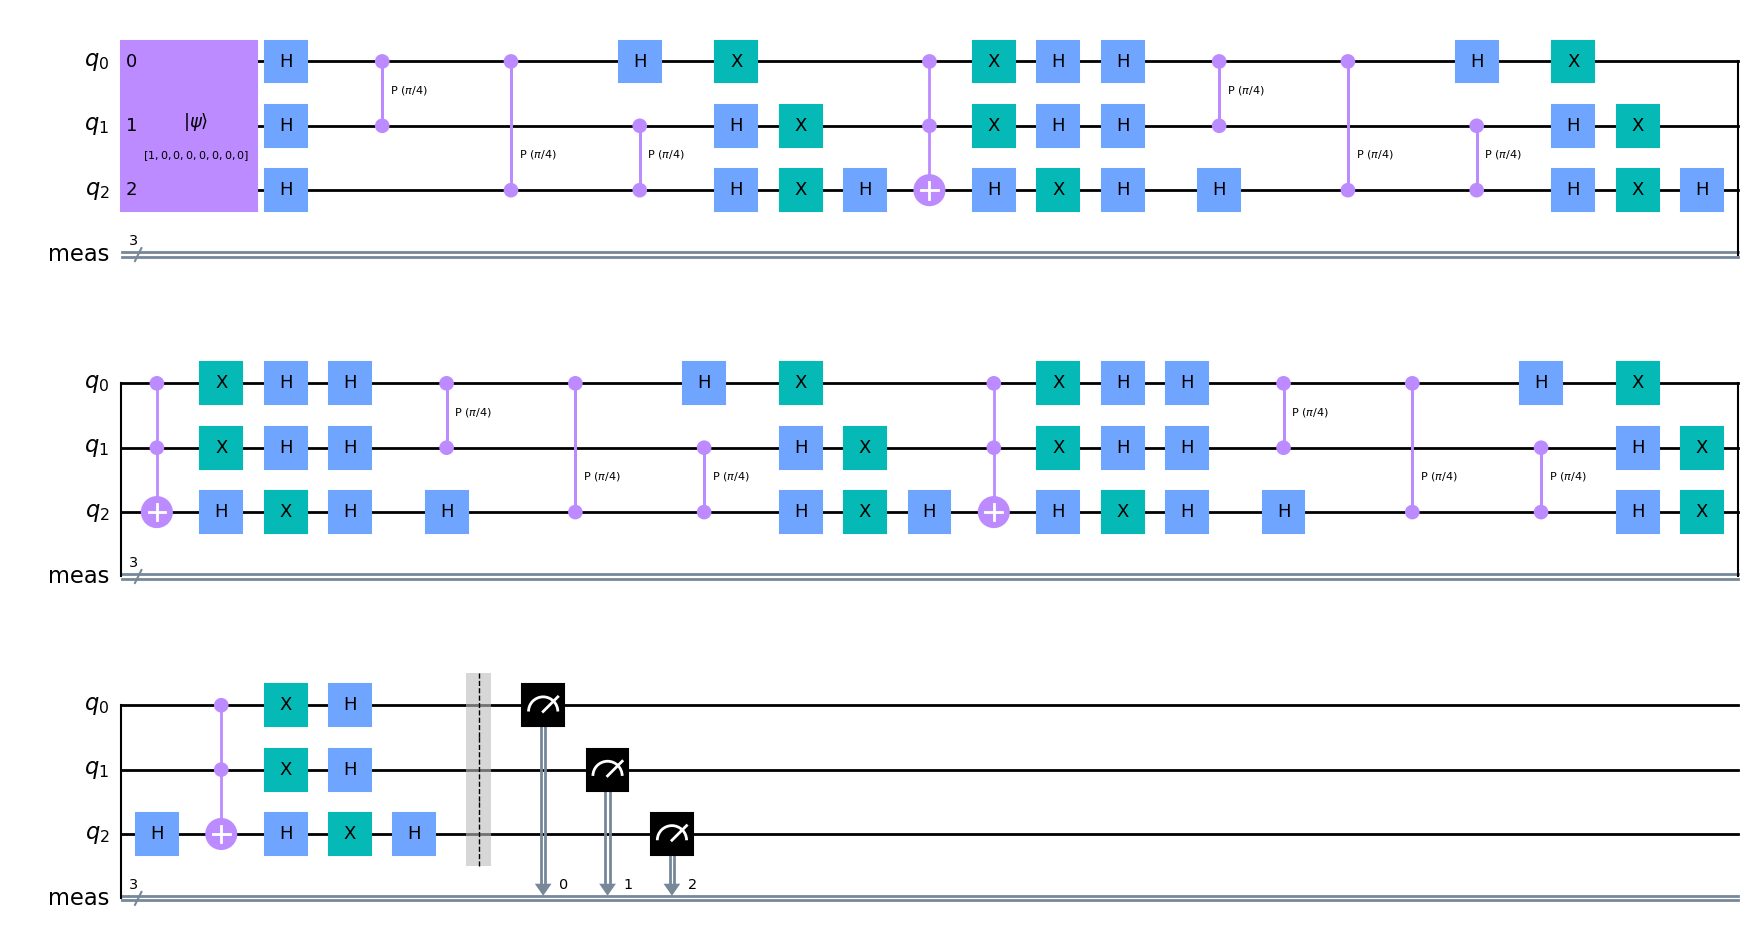

In [30]:
qc.draw(output="mpl")